In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
sns.set()
plt.rcParams['figure.figsize'] = (10, 5)

In [89]:
nifty_data = pd.read_csv('data/Nifty50HistoricalData.csv')
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'], infer_datetime_format=True)
nifty_data = nifty_data[['Date', 'Adj Close']]
nifty_data.columns = ['Date', 'NiftyValue']

In [90]:
nifty_data.head()

,Date,NiftyValue
0,2011-01-03,6157.600098
1,2011-01-04,6146.350098
2,2011-01-05,6079.799805
3,2011-01-06,6048.250000
4,2011-01-07,5904.600098


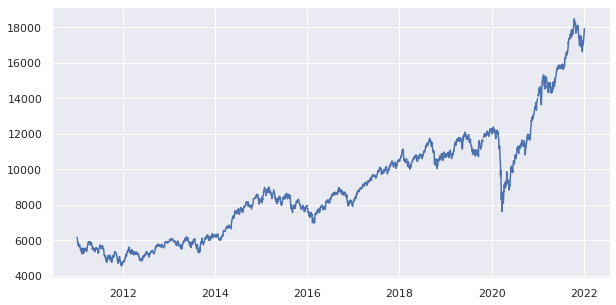

In [84]:
plt.plot(nifty_data['Date'], nifty_data['NiftyValue'])
plt.show()

In [92]:
num_trading_days = 250

In [94]:
num_years = [1 , 3, 5]

for num_year in num_years:
    nifty_data[f'nifty_{num_year}Y_rolling_ret'] = nifty_data['NiftyValue'].pct_change(periods=num_trading_days * num_year)
    nifty_data[f'nifty_{num_year}Y_rolling_ret'] = ((nifty_data[f'nifty_{num_year}Y_rolling_ret'] + 1)**(1/num_year)) - 1

In [95]:
nifty_data

,Date,NiftyValue,nifty_1Y_rolling_ret,nifty_3Y_rolling_ret,nifty_5Y_rolling_ret
0,2011-01-03,6157.600098,NaN,NaN,NaN
1,2011-01-04,6146.350098,NaN,NaN,NaN
2,2011-01-05,6079.799805,NaN,NaN,NaN
3,2011-01-06,6048.250000,NaN,NaN,NaN
4,2011-01-07,5904.600098,NaN,NaN,NaN
...,...,...,...,...,...
2715,2021-12-30,17203.949219,0.240085,0.164721,0.158007
2716,2021-12-31,17354.050781,0.245572,0.167372,0.162592
2717,2022-01-03,17625.699219,0.260604,0.171338,0.164759
2718,2022-01-04,17805.250000,0.273464,0.175860,0.168242


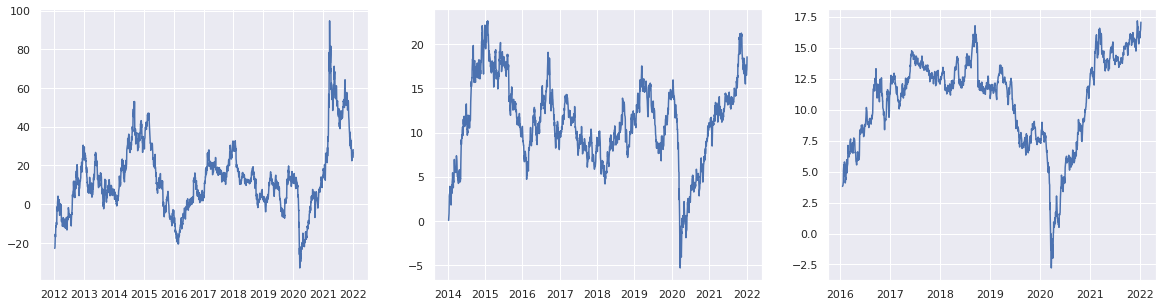

In [96]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
num_trading_days_1Y = num_trading_days
num_trading_days_3Y = num_trading_days * 3
num_trading_days_5Y = num_trading_days * 5
ax[0].plot(nifty_data['Date'][num_trading_days_1Y:], nifty_data['nifty_1Y_rolling_ret'][num_trading_days_1Y:] * 100)
ax[1].plot(nifty_data['Date'][num_trading_days_3Y:], nifty_data['nifty_3Y_rolling_ret'][num_trading_days_3Y:] * 100)
ax[2].plot(nifty_data['Date'][num_trading_days_5Y:], nifty_data['nifty_5Y_rolling_ret'][num_trading_days_5Y:] * 100)
plt.show()

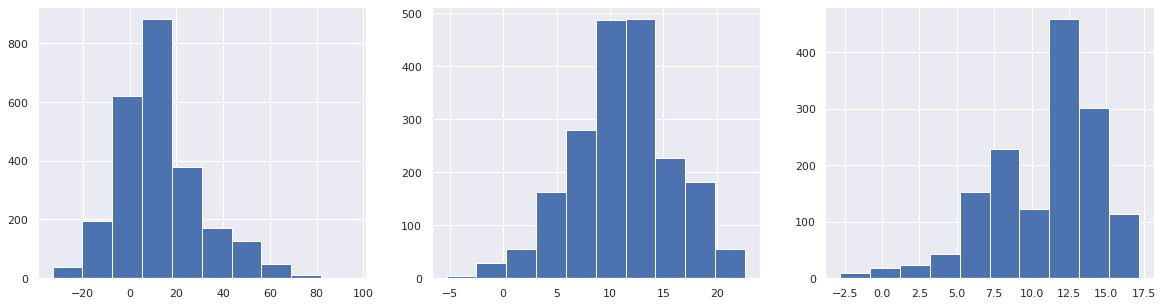

In [97]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
num_trading_days_1Y = num_trading_days
num_trading_days_3Y = num_trading_days * 3
num_trading_days_5Y = num_trading_days * 5
ax[0].hist(nifty_data['nifty_1Y_rolling_ret'][num_trading_days_1Y:] * 100)
ax[1].hist(nifty_data['nifty_3Y_rolling_ret'][num_trading_days_3Y:] * 100)
ax[2].hist(nifty_data['nifty_5Y_rolling_ret'][num_trading_days_5Y:] * 100)
plt.show()

In [98]:
mean_ret_1Y = nifty_data['nifty_1Y_rolling_ret'][num_trading_days_1Y:].mean()
std_ret_1Y = nifty_data['nifty_1Y_rolling_ret'][num_trading_days_1Y:].std()
mean_ret_3Y = nifty_data['nifty_3Y_rolling_ret'][num_trading_days_3Y:].mean()
std_ret_3Y = nifty_data['nifty_3Y_rolling_ret'][num_trading_days_3Y:].std()
mean_ret_5Y = nifty_data['nifty_5Y_rolling_ret'][num_trading_days_5Y:].mean()
std_ret_5Y = nifty_data['nifty_5Y_rolling_ret'][num_trading_days_5Y:].std()

print(f'Mean return - 1y: {mean_ret_1Y * 100}')
print(f'Std return - 1y: {std_ret_1Y * 100}')
print(f'Mean return - 3y: {mean_ret_3Y * 100}')
print(f'Std return - 3y: {std_ret_3Y * 100}')
print(f'Mean return - 5y: {mean_ret_5Y * 100}')
print(f'Std return - 5y: {std_ret_5Y * 100}')

Mean return - 1y: 13.137673638610462
Std return - 1y: 17.75794356226624
Mean return - 3y: 11.18594832623553
Std return - 3y: 4.647398637676839
Mean return - 5y: 10.795438892385611
Std return - 5y: 3.5932557684026785


## Axis bluechip fund performance

In [101]:
axis_bluechip_data = pd.read_csv('data/AxisBluechipDirectGrowth.csv', skiprows=4)
axis_bluechip_data['Date'] = pd.to_datetime(axis_bluechip_data['NAV date'], infer_datetime_format=True)
axis_bluechip_data = axis_bluechip_data[['Date', 'Net Asset Value']]
axis_bluechip_data.columns = ['Date', 'axis_mf_NAV']
axis_bluechip_data.head(10)

,Date,axis_mf_NAV
0,2013-01-02,12.28
1,2013-01-03,12.32
2,2013-01-04,12.35
3,2013-01-07,12.28
4,2013-01-08,12.34
5,2013-01-09,12.28
6,2013-01-10,12.29
7,2013-01-11,12.25
8,2013-01-14,12.37
9,2013-01-15,12.41


In [102]:
axis_bluechip_data = axis_bluechip_data.merge(nifty_data, on='Date', how = 'inner')

In [100]:
axis_bluechip_data

,Date,axis_mf_NAV,NiftyValue,nifty_1Y_rolling_ret,nifty_3Y_rolling_ret,nifty_5Y_rolling_ret
0,2013-01-02,12.28,5993.250000,0.296034,NaN,NaN
1,2013-01-03,12.32,6009.500000,0.261096,NaN,NaN
2,2013-01-04,12.35,6016.149902,0.266651,NaN,NaN
3,2013-01-07,12.28,5988.399902,0.260729,NaN,NaN
4,2013-01-08,12.34,6001.700195,0.262426,NaN,NaN
...,...,...,...,...,...,...
2266,2021-12-30,51.00,17203.949219,0.240085,0.164721,0.158007
2267,2021-12-31,51.47,17354.050781,0.245572,0.167372,0.162592
2268,2022-01-03,52.27,17625.699219,0.260604,0.171338,0.164759
2269,2022-01-04,52.72,17805.250000,0.273464,0.175860,0.168242


In [104]:
num_years = [1, 3, 5]

fund_name = 'axis_bluechip'

for num_year in num_years:
    axis_bluechip_data[f'{fund_name}_{num_year}Y_rolling_ret'] = axis_bluechip_data['axis_mf_NAV'].pct_change(periods=num_trading_days * num_year)
    axis_bluechip_data[f'{fund_name}_{num_year}Y_rolling_ret'] = ((axis_bluechip_data[f'{fund_name}_{num_year}Y_rolling_ret'] + 1)**(1/num_year)) - 1

In [105]:
axis_bluechip_data

,Date,axis_mf_NAV,NiftyValue,nifty_1Y_rolling_ret,nifty_3Y_rolling_ret,nifty_5Y_rolling_ret,axis_bluechip_1Y_rolling_ret,axis_bluechip_3Y_rolling_ret,axis_bluechip_5Y_rolling_ret
0,2013-01-02,12.28,5993.250000,0.296034,NaN,NaN,NaN,NaN,NaN
1,2013-01-03,12.32,6009.500000,0.261096,NaN,NaN,NaN,NaN,NaN
2,2013-01-04,12.35,6016.149902,0.266651,NaN,NaN,NaN,NaN,NaN
3,2013-01-07,12.28,5988.399902,0.260729,NaN,NaN,NaN,NaN,NaN
4,2013-01-08,12.34,6001.700195,0.262426,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2266,2021-12-30,51.00,17203.949219,0.240085,0.164721,0.158007,0.230992,0.206631,0.193500
2267,2021-12-31,51.47,17354.050781,0.245572,0.167372,0.162592,0.233110,0.208111,0.195919
2268,2022-01-03,52.27,17625.699219,0.260604,0.171338,0.164759,0.249880,0.215449,0.199386
2269,2022-01-04,52.72,17805.250000,0.273464,0.175860,0.168242,0.252852,0.219067,0.203278


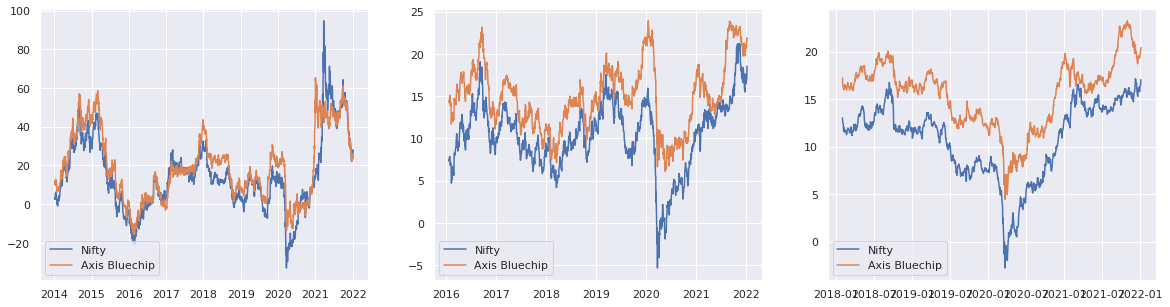

In [110]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
num_trading_days_1Y = num_trading_days
num_trading_days_3Y = num_trading_days * 3
num_trading_days_5Y = num_trading_days * 5
ax[0].plot(axis_bluechip_data['Date'][num_trading_days_1Y:], axis_bluechip_data['nifty_1Y_rolling_ret'][num_trading_days_1Y:] * 100)
ax[0].plot(axis_bluechip_data['Date'][num_trading_days_1Y:], axis_bluechip_data['axis_bluechip_1Y_rolling_ret'][num_trading_days_1Y:] * 100)
ax[0].legend(['Nifty', 'Axis Bluechip'], loc='lower left')
ax[1].plot(axis_bluechip_data['Date'][num_trading_days_3Y:], axis_bluechip_data['nifty_3Y_rolling_ret'][num_trading_days_3Y:] * 100)
ax[1].plot(axis_bluechip_data['Date'][num_trading_days_3Y:], axis_bluechip_data['axis_bluechip_3Y_rolling_ret'][num_trading_days_3Y:] * 100)
ax[1].legend(['Nifty', 'Axis Bluechip'], loc='lower left')
ax[2].plot(axis_bluechip_data['Date'][num_trading_days_5Y:], axis_bluechip_data['nifty_5Y_rolling_ret'][num_trading_days_5Y:] * 100)
ax[2].plot(axis_bluechip_data['Date'][num_trading_days_5Y:], axis_bluechip_data['axis_bluechip_5Y_rolling_ret'][num_trading_days_5Y:] * 100)
ax[2].legend(['Nifty', 'Axis Bluechip'], loc='lower left')
plt.show()

In [111]:
mean_ret_1Y = axis_bluechip_data['axis_bluechip_1Y_rolling_ret'][num_trading_days_1Y:].mean()
std_ret_1Y = axis_bluechip_data['axis_bluechip_1Y_rolling_ret'][num_trading_days_1Y:].std()
mean_ret_3Y = axis_bluechip_data['axis_bluechip_3Y_rolling_ret'][num_trading_days_3Y:].mean()
std_ret_3Y = axis_bluechip_data['axis_bluechip_3Y_rolling_ret'][num_trading_days_3Y:].std()
mean_ret_5Y = axis_bluechip_data['axis_bluechip_5Y_rolling_ret'][num_trading_days_5Y:].mean()
std_ret_5Y = axis_bluechip_data['axis_bluechip_5Y_rolling_ret'][num_trading_days_5Y:].std()

print(f'Mean return - 1y: {mean_ret_1Y * 100}')
print(f'Std return - 1y: {std_ret_1Y * 100}')
print(f'Mean return - 3y: {mean_ret_3Y * 100}')
print(f'Std return - 3y: {std_ret_3Y * 100}')
print(f'Mean return - 5y: {mean_ret_5Y * 100}')
print(f'Std return - 5y: {std_ret_5Y * 100}')

Mean return - 1y: 18.929697434860252
Std return - 1y: 17.89265011577146
Mean return - 3y: 14.638077441215074
Std return - 3y: 4.029249350136227
Mean return - 5y: 15.119594137802414
Std return - 5y: 3.8344375508540915
